# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Exploring the data

In [4]:
df.shape

(1025, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

## Checking if the dataset is balanced or not

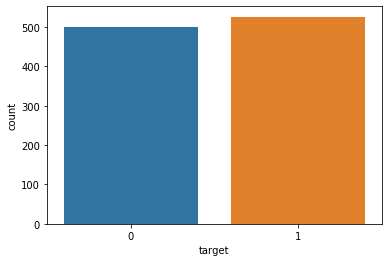

In [8]:
sns.countplot(x='target', data=df)  
#from the count plot, it looks like the dataset is balanced

# Feature Engineering

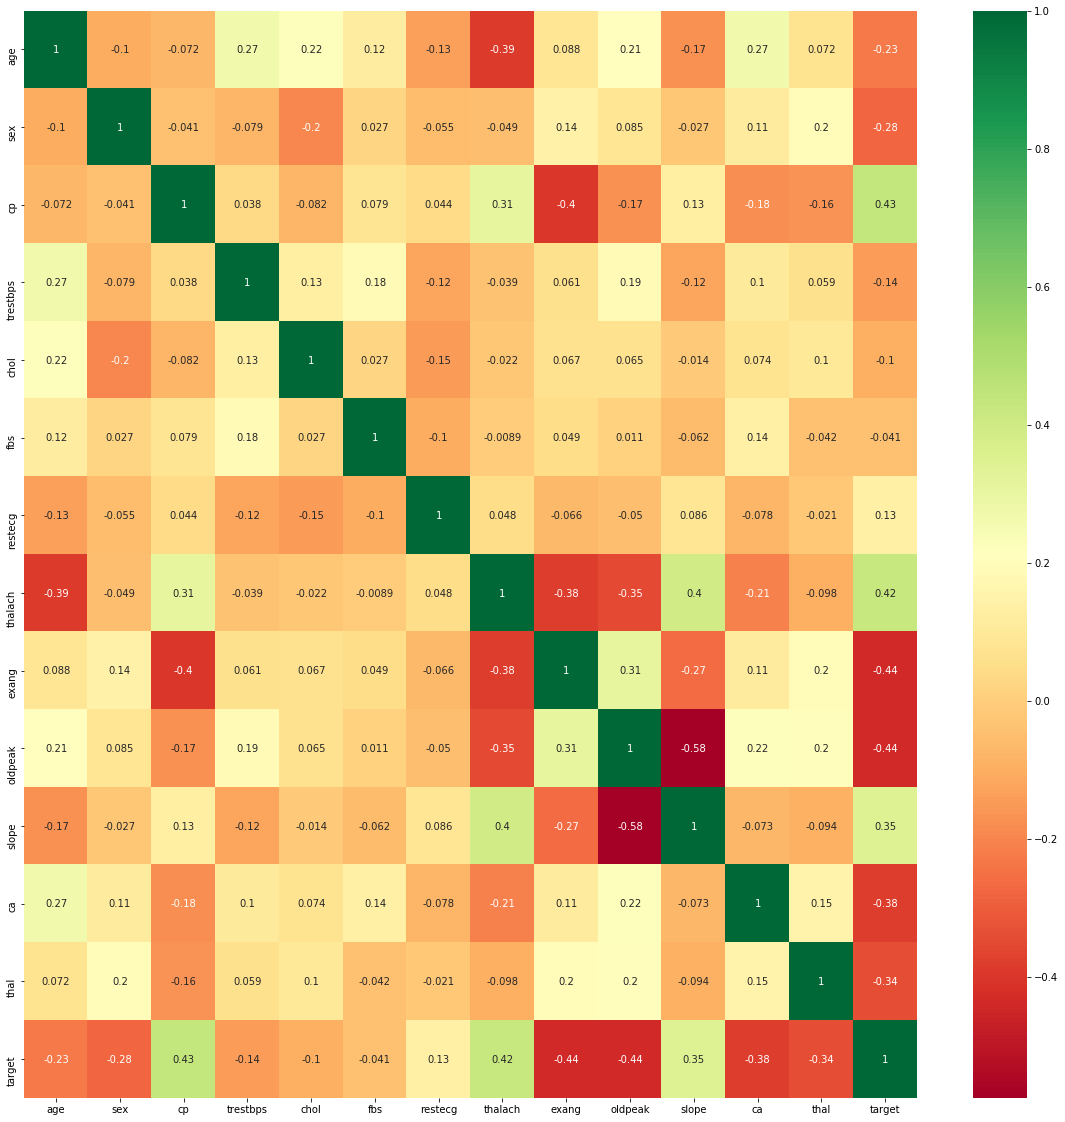

In [15]:
from scipy.stats import pearsonr
corr_mat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True, cmap='RdYlGn')

In [36]:
# looking at the features having a high correlation with our target variable
corr_features=[] 
mat= corr_mat.iloc[:-1]["target"]
for index,i in enumerate(mat):
    if i >= 0.4 or i <= -0.4:
        corr_features.append(mat.index[index])
corr_features

['cp', 'thalach', 'exang', 'oldpeak']

# Exploratory Data Analysis

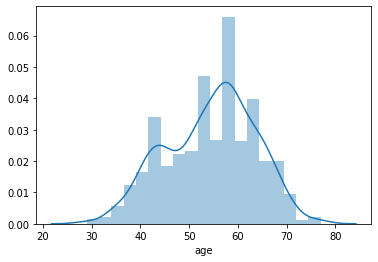

In [10]:
sns.distplot(df.age)

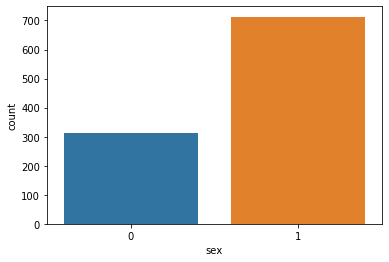

In [15]:
sns.countplot(df.sex)
plt.show()

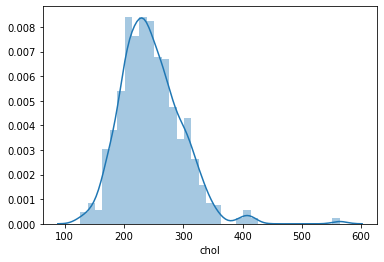

In [9]:
sns.distplot(df.chol)

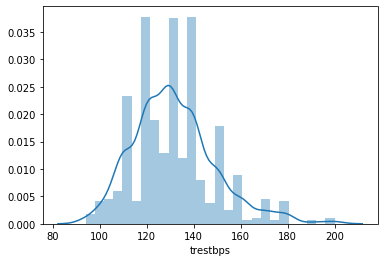

In [11]:
sns.distplot(df.trestbps)

<Figure size 1440x1440 with 0 Axes>

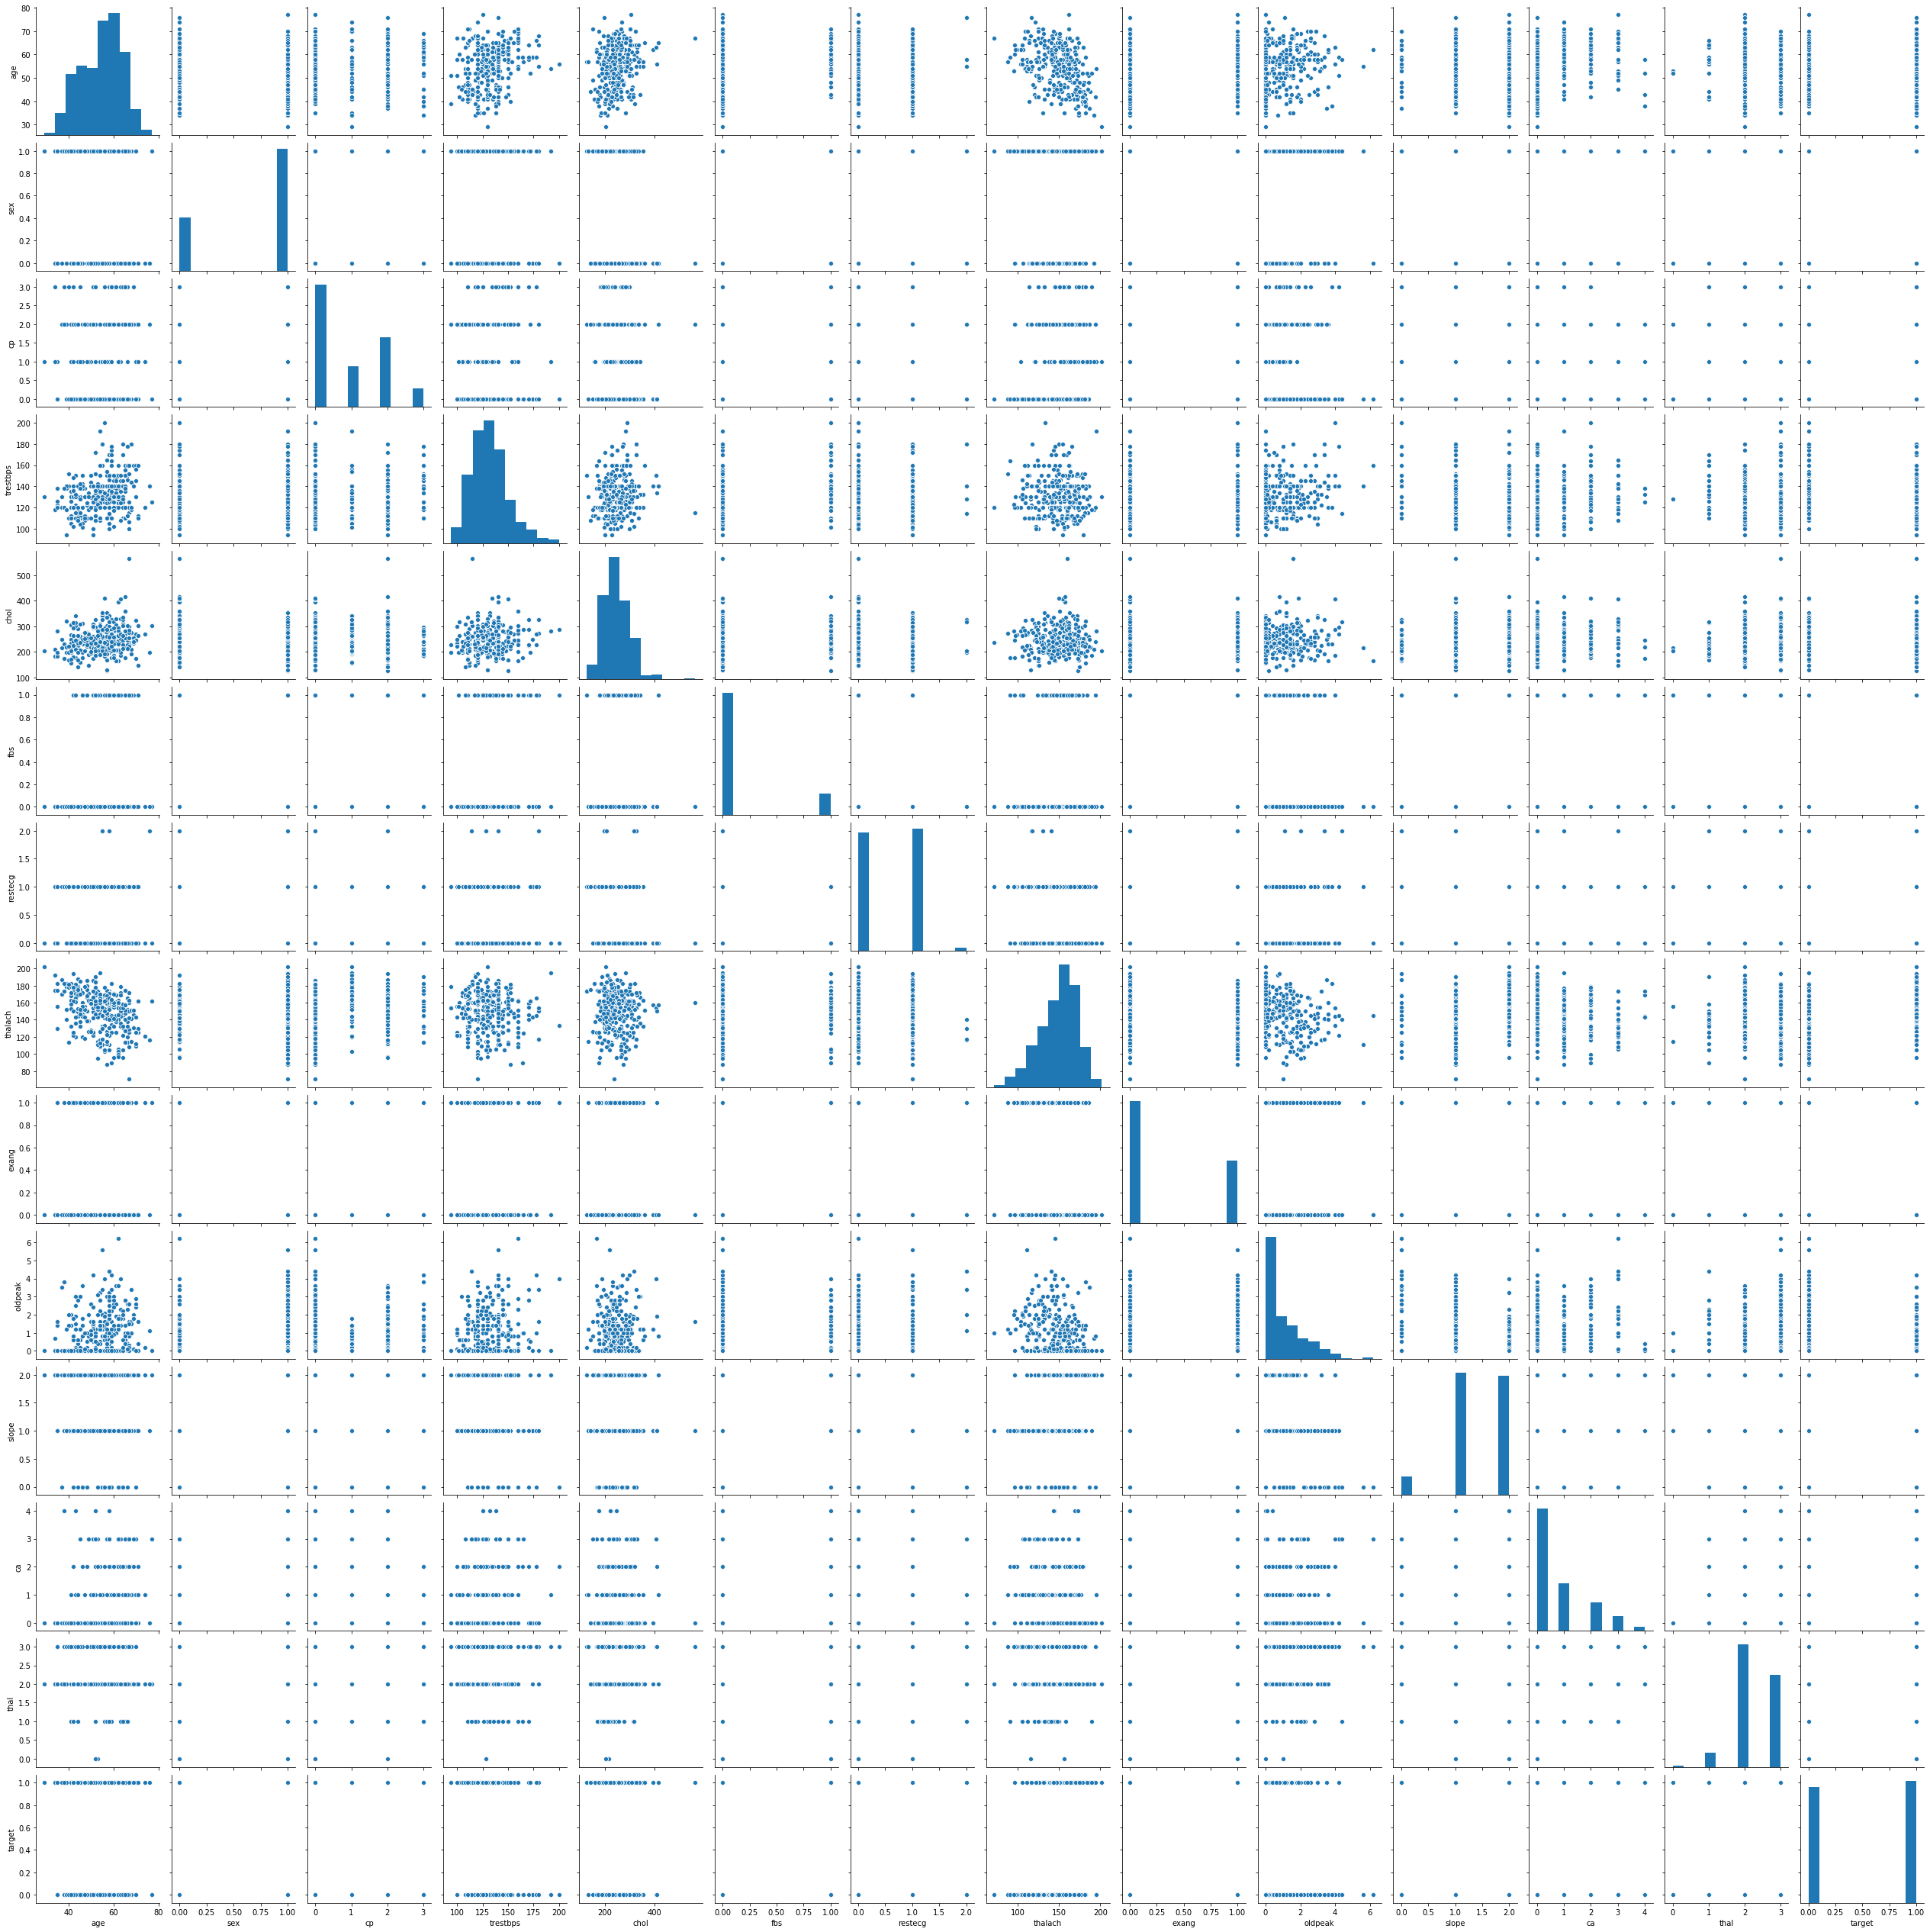

In [13]:
plt.figure(figsize=(30,30))
sns.pairplot(df)
plt.show()

# Feature Selection

In [43]:
features=df.drop("target", axis=1)
target=df["target"]

# KNeigbhors Classifier implemented

In [67]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [73]:
leaf_size = list(range(30,50))
n_neighbors = list(range(4,30))
p=[1,2]

In [74]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [75]:
knn= KNeighborsClassifier()
clf=GridSearchCV(knn, hyperparameters, cv=7)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [76]:
print(accuracy_score(y_test, y_pred))

0.7597402597402597


In [77]:
print(clf.best_params_)

{'p': 2, 'n_neighbors': 13, 'leaf_size': 42}


# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

In [116]:
hyperparameters=dict(solvers = ['newton-cg', 'lbfgs', 'liblinear'], penalty = ['l2'], C = [100, 10, 1.0, 0.1, 0.01])

In [117]:
model=LogisticRegression(max_iter=1)
clf2=GridSearchCV(model, hyperparameters, cv=7)
clf2.fit(X_train, y_train)

ValueError: Invalid parameter solvers for estimator LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [112]:
y_pred=clf2.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [113]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


NameError: name 'rint' is not defined

# Random Forest Regressor